<a href="https://colab.research.google.com/github/SubashiniRamesh/TNSDC-Generative-AI/blob/main/Age_and_gender_prediction(main).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"subhashiniramesh","key":"e7a4fff6f7a6b65219e26b9a231bff9f"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                            Student Performance Factors                          94KB  2024-09-02 10:53:57          13676        283  1.0              
owm4096/laptop-prices                                              Laptop Prices                                        25KB  2024-09-09 12:43:01           3695         69  1.0              
muhammadehsan02/global-football-results-18722024                   Global Football Results: (1872–2024)                  1MB  2024-09-04 10:00:52           1266         27  1.0              
nyagami/ea-sports-fc-25-database-ratings-and-

In [ ]:
! kaggle datasets download 'jangedoo/utkface-new'

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
100% 331M/331M [00:19<00:00, 19.2MB/s]
100% 331M/331M [00:19<00:00, 18.1MB/s]


In [ ]:
!unzip utkface-new.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
import os
from tqdm import tqdm

# Specify the path to the folder where your data is stored in Colab (e.g., /content/my_data)
BASE_DIR = '/content/crop_part1'

image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)


100%|██████████| 9780/9780 [00:00<00:00, 394813.12it/s]


In [ ]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/crop_part1/10_0_0_20170110224549512.j...,10,0
1,/content/crop_part1/30_1_2_20170105170141222.j...,30,1
2,/content/crop_part1/2_0_2_20170110212538628.jp...,2,0
3,/content/crop_part1/65_0_0_20170111203730182.j...,65,0
4,/content/crop_part1/20_1_3_20170104231536521.j...,20,1


In [ ]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

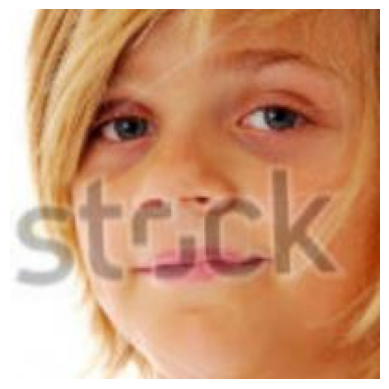

In [ ]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

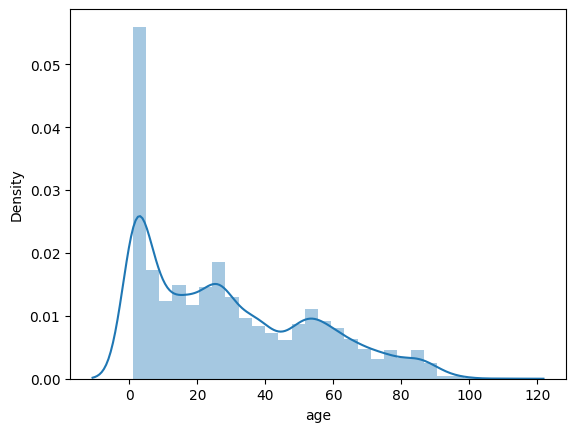

In [ ]:
sns.distplot(df['age'])

<Axes: ylabel='count'>

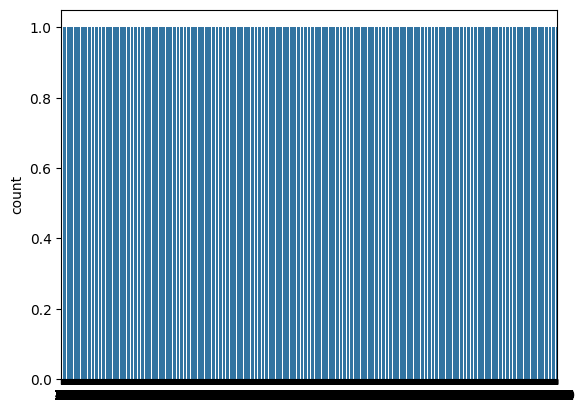

In [ ]:
sns.countplot(df['gender'])

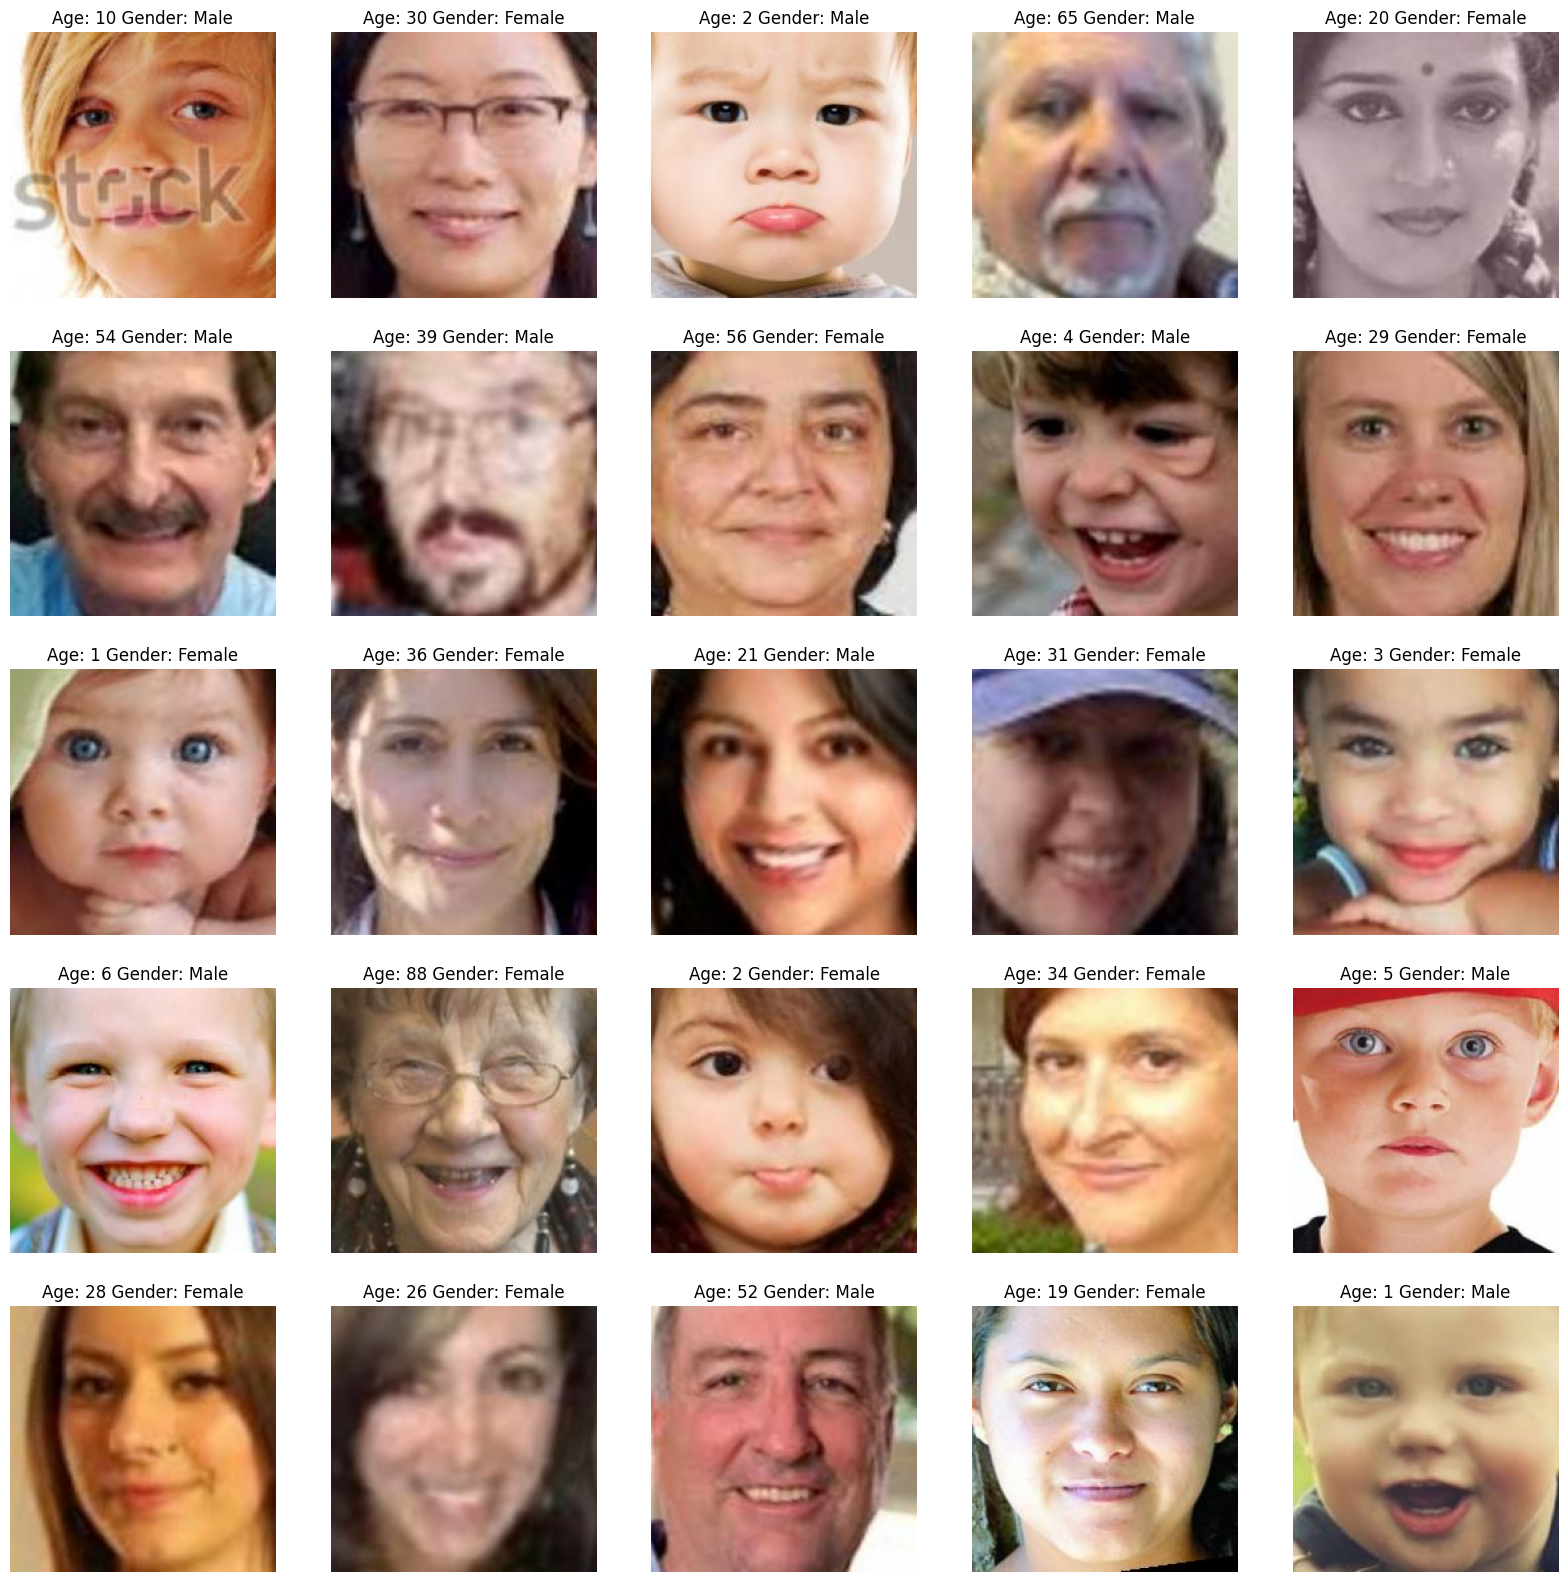

In [ ]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
!pip install --upgrade Pillow

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.Resampling.LANCZOS) # Use Image.Resampling.LANCZOS instead of Image.ANTIALIAS
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_features(df['image'])
X.shape

100%|██████████| 9780/9780 [00:15<00:00, 640.79it/s]


(9780, 128, 128, 1)

In [ ]:
# normalize the images
X = X/255.0

In [ ]:
#y_gender = np.array(df['gender'])
#y_age = np.array(df['age'])

In [ ]:
#y_age = df['age'].values  # Convert age labels to numpy array
#y_gender = df['gender'].values  # Convert gender labels to numpy array


In [ ]:
input_shape = (128, 128, 1)
inputs = Input((input_shape))

# Convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_2)

# Gender output (binary classification)
output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)

# Age output (regression)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

# Define the model
model = Model(inputs=[inputs], outputs=[output_1, output_2])

# Compile the model
model.compile(optimizer='adam',
              loss={'gender_out': 'binary_crossentropy', 'age_out': 'mean_absolute_error'},  # Adjust loss functions
              metrics={'gender_out': 'accuracy', 'age_out': 'mean_absolute_error'})  # Track MAE for age prediction

# Now you can train your model as usual
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - age_out_mean_absolute_error: 22.2740 - gender_out_accuracy: 0.5151 - loss: 23.0155 - val_age_out_mean_absolute_error: 18.5778 - val_gender_out_accuracy: 0.5613 - val_loss: 19.2538
Epoch 2/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - age_out_mean_absolute_error: 17.0120 - gender_out_accuracy: 0.6022 - loss: 17.6654 - val_age_out_mean_absolute_error: 12.1921 - val_gender_out_accuracy: 0.6979 - val_loss: 12.7607
Epoch 3/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - age_out_mean_absolute_error: 12.0750 - gender_out_accuracy: 0.6744 - loss: 12.6600 - val_age_out_mean_absolute_error: 10.8204 - val_gender_out_accuracy: 0.7157 - val_loss: 11.3554
Epoch 4/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - age_out_mean_absolute_error: 11.0184 - gender_out_accuracy: 0.6916 - loss: 11.5825 - val_age_out_mean_absolute_error: 12.8622 - val_gender_out_accuracy: 0.7336 - val_loss: 13.3827
Epoch 5/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - a

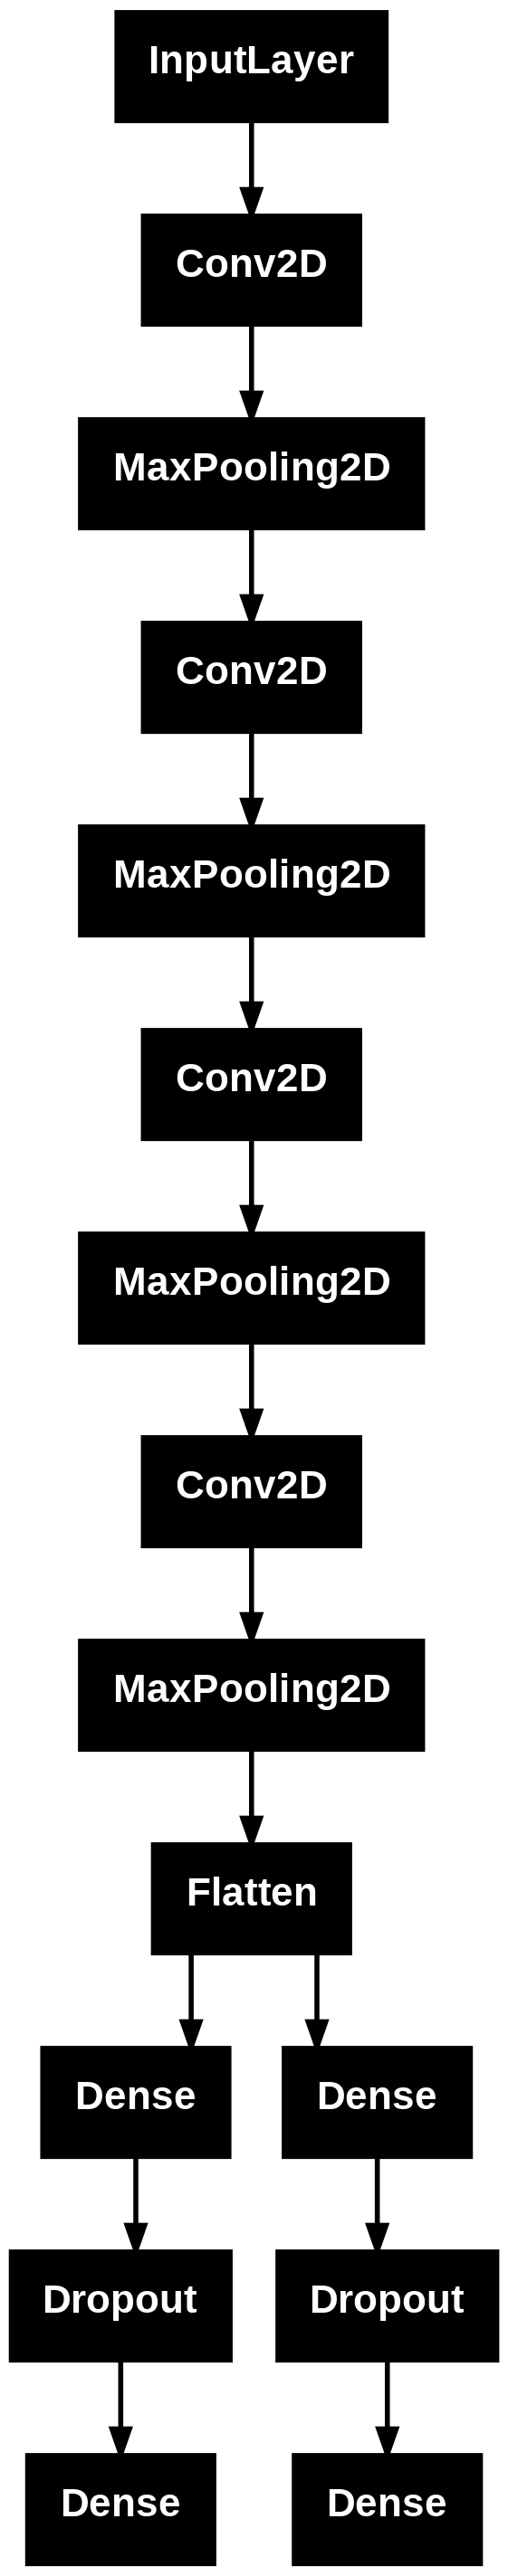

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# Print the unique values in y_age
print(np.unique(y_age))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 110]


In [ ]:
print(history.history.keys())

dict_keys(['age_out_mean_absolute_error', 'gender_out_accuracy', 'loss', 'val_age_out_mean_absolute_error', 'val_gender_out_accuracy', 'val_loss'])


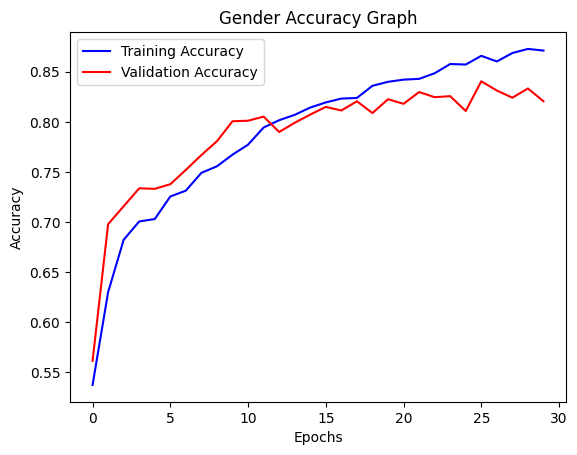

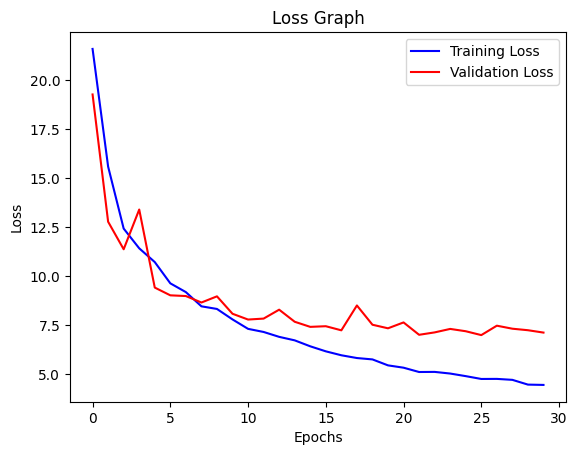

In [ ]:
import matplotlib.pyplot as plt

# Plot results for gender accuracy
gender_acc = history.history['gender_out_accuracy']
val_gender_acc = history.history['val_gender_out_accuracy']
epochs = range(len(gender_acc))

plt.plot(epochs, gender_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_gender_acc, 'r', label='Validation Accuracy')
plt.title('Gender Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Plot loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Original Gender: Male Original Age: 47
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
Predicted Gender: Male Predicted Age: 44


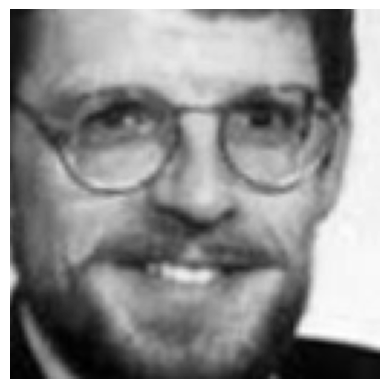

In [ ]:
image_index = 4000

# Display original gender and age
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))

# Adjusted for single output
pred_gender = gender_dict[int(np.round(pred[0][0]))]  # Use np.round and convert to int
pred_age = int(np.round(pred[1][0]))  # Round age prediction and convert to int

# Display predicted gender and age
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')
plt.show()


Original Gender: Female Original Age: 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Gender: Female Predicted Age: 26


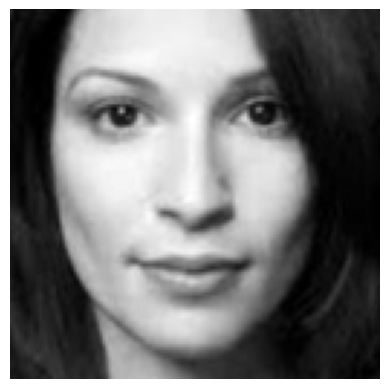

In [ ]:
image_index = 400

# Display original gender and age
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))

# Adjusted for single output
pred_gender = gender_dict[int(np.round(pred[0][0]))]  # Use np.round and convert to int
pred_age = int(np.round(pred[1][0]))  # Round age prediction and convert to int

# Display predicted gender and age
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')
plt.show()


Original Gender: Female Original Age: 68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Gender: Female Predicted Age: 63


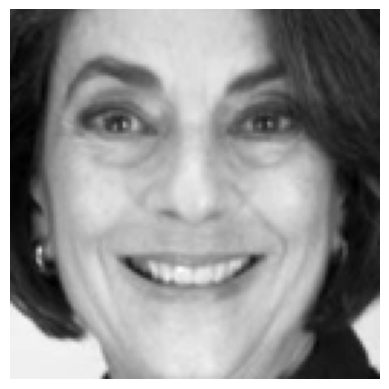

In [ ]:
image_index = 250

# Display original gender and age
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))

# Adjusted for single output
pred_gender = gender_dict[int(np.round(pred[0][0]))]  # Use np.round and convert to int
pred_age = int(np.round(pred[1][0]))  # Round age prediction and convert to int

# Display predicted gender and age
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

# Display the image
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')
plt.show()
